In [99]:
import tensorflow as tf # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout,Input # type: ignore
from tensorflow.keras.models import Sequential # type: ignore

In [100]:
tf.__version__

'2.18.0'

## Preprocessing

In [101]:
train_datagen = ImageDataGenerator(
    rescale=1./255
)

training_set = train_datagen.flow_from_directory('./data/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3087 images belonging to 7 classes.


In [102]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('./data/Testing',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
validation_set=test_datagen.flow_from_directory('./data/Validation',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


## Visualizations

{'CaS': 480, 'CoS': 450, 'Gum': 360, 'MC': 540, 'OC': 324, 'OLP': 540, 'OT': 393}


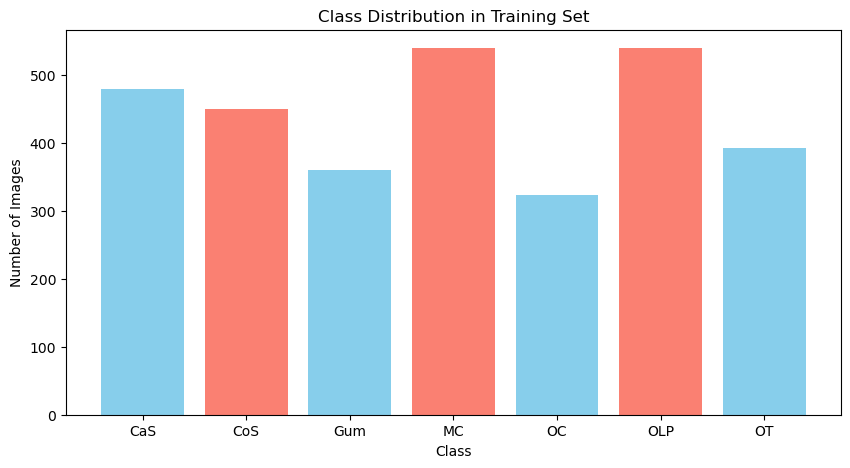

In [103]:
#Visualize the distribution of the classes to understand the balance of the dataset.
import os
import matplotlib.pyplot as plt
import seaborn as sns
train_dir='./data/Training'
class_counts={}

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path): #if it is an existing floder
         count = len([
            img for img in os.listdir(class_path)
            if img.lower().endswith(('.jpg'))
        ])
    class_counts[class_name] = count
print(class_counts)
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=['skyblue', 'salmon'])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Training Set')


plt.show()

## Building the model

In [104]:
from tensorflow.keras.applications import MobileNetV2 # type: ignore
from tensorflow.keras.models import Model # type: ignore


base_model=MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet"
    )


input_l=Input(shape=(224,224,3))

x=base_model(input_l,training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(7, activation='softmax')(x) 

model=Model(input_l,output)

base_model.trainable=True


print(model.summary())

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_27 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_12     │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,855 (9.24 MB)

 Trainable params: 2,388,743 (9.11 MB)

 Non-trainable params: 34,112 (133.25 KB)

None


In [105]:
len(base_model.layers)

154

Epoch 1/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.3513 - loss: 1.7918 - val_accuracy: 0.6848 - val_loss: 0.8949
Epoch 2/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.6420 - loss: 0.9635 - val_accuracy: 0.7850 - val_loss: 0.6559
Epoch 3/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.7559 - loss: 0.6723 - val_accuracy: 0.8405 - val_loss: 0.5238
Epoch 4/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.8067 - loss: 0.5573 - val_accuracy: 0.8609 - val_loss: 0.4434
Epoch 5/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 97s 997ms/step - accuracy: 0.8449 - loss: 0.4446 - val_accuracy: 0.8881 - val_loss: 0.3452
Epoch 6/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.8726 - loss: 0.3723 - val_accuracy: 0.9086 - val_loss: 0.2971
Epoch 7/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.8884 - loss: 0.3215 - val_accuracy: 0.9241 - val_loss: 0.2606
Epoch 8/8
97/97 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.9169 - loss: 0.2729 - val_accuracy: 0.9319 - val_loss

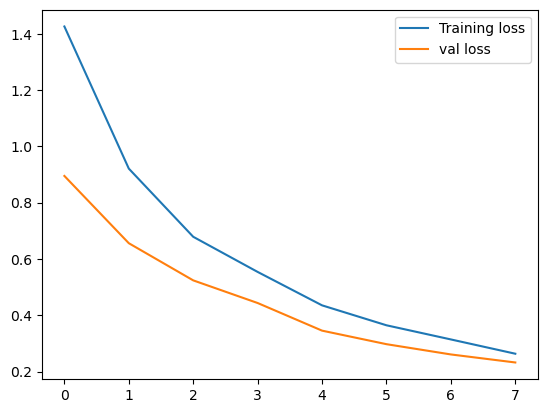

In [106]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


for layer in base_model.layers[:100]:
    base_model.trainable=False
    

    
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    training_set,
    epochs=8,
    validation_data=validation_set
    
)

loss, accuracy = model.evaluate(test_set)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
plt.plot(history.history["loss"],label="Training loss")
plt.plot(history.history["val_loss"],label="val loss")
plt.legend()
plt.show()

In [107]:
model.save("mobilenetv2_model.h5")